# Polynomial Regression

In this code, I am going to show how to create a [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) using the [Turicreate](https://github.com/apple/turicreate) package for one single feature.

The idea is to create a *linear regression* with multiple features, but each feature is just a **power** of the investigated feature. We will need to create functions to compute the powers of the feature and also functions to find what is the the maximum power that reduces the error on the test data. The linear regression will be done using the Turicreate only, but you can try use our functions from the [linear regression](https://github.com/marceloguarido/Machine-Learning/blob/master/Linear_Regression/Linear_Regression.ipynb) file.

First, let's load used packages:

In [75]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, load the BostonHousing.csv and save as a *sframe*.

In [76]:
data = tc.SFrame('../Data/BostonHousing.csv')

Finished parsing file /home/mguarido/OneDrive/Machine_Learning/Data/BostonHousing.csv

Parsing completed. Parsed 100 lines in 0.030902 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/mguarido/OneDrive/Machine_Learning/Data/BostonHousing.csv

Parsing completed. Parsed 21613 lines in 0.047287 secs.

For this analysis, we will only use the feature *'sqft_living'* and the output is *'price'*. So, let's sort the data into *'sqft_living'* and *'price'* for plotting purposes.

In [77]:
data = data.sort(['sqft_living', 'price'])

Now, let's create a function that receives the feature and the maximum power (2, 3, 4, or any desired value) to create a new column of sframe for each power.

In [78]:
def create_powers(feature, power = 1):
    # Power should be > 1 and, if not defined, will be 1 (will not create a polynomium)
    # Now, let's create an empty sframe
    poly_feature = tc.SFrame()
    
    # Include the input feature as "power_1"
    poly_feature['power_1'] = feature
    
    # Let's create the condition it will only run for power > 1
    if power > 1:
        # Run the loop for all the powers. Remember that the function 'range' starts from 0
        # and ends at <given number> - 1. So, define range(2, power+1)
        for pw in range(2, power+1):
            # Write the name of the column
            name = 'power_' + str(pw)
            
            # Now, calculating the power of the feature and saving at the sframe
            poly_feature[name] = feature.apply(lambda x: x**pw)
            
    # Return polynomial sframe
    return poly_feature

Now, let's give a power 3 for the *'sqft_living'* and see if it works:

In [79]:
test = create_powers(data['sqft_living'], 3)
test.head()

power_1,power_2,power_3
290,84100,24389000
370,136900,50653000
380,144400,54872000
384,147456,56623104
390,152100,59319000
390,152100,59319000
410,168100,68921000
420,176400,74088000
420,176400,74088000
430,184900,79507000


Okay, looks good. To use the Turicreate to create a polynomial regression, we "trick" it by giving each power as an individual feature and do a linear regression with multiple features.

Now, let's create some models with different powers and see their behavior. First, a simple linear regression (do not forget to include the *'price'* in the sframe as it is the target):

In [80]:
poly1 = create_powers(data['sqft_living'], 1)
poly1['price'] = data['price']
model1 = tc.linear_regression.create(poly1, target = 'price', features = ['power_1'], verbose = False)

Let's see the coefficients of the model1.

In [81]:
model1.coefficients

name,index,value,stderr
(intercept),None,-46439.4264936,4534.47106965
power_1,None,282.367274354,1.99343122996


Now, plot the regression over the data.

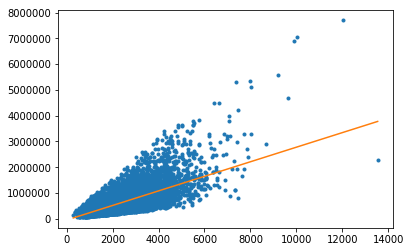

In [82]:
plt.plot(poly1['power_1'],poly1['price'],'.',
        poly1['power_1'], model1.predict(poly1),'-')

Okay, it is quite similar to the one of the linear regression code. Now, let's do the same for the power 2:

In [83]:
poly2 = create_powers(data['sqft_living'], 2)
my_features = poly2.column_names()
poly2['price'] = data['price']
model2 = tc.linear_regression.create(poly2, target = 'price', features = my_features, verbose = False)
model2.coefficients

name,index,value,stderr
(intercept),None,262012.230305,7399.69534379
power_1,None,9.68037501898,5.69514714521
power_2,None,0.0498422083545,0.00099230131444


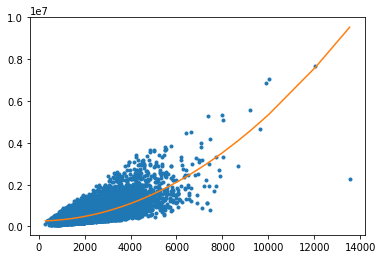

In [84]:
plt.plot(poly2['power_1'],poly2['price'],'.',
        poly2['power_1'], model2.predict(poly2),'-')

Interesting. Visually, the quadratic function looks to fit better the data. Can we make it better with a power of 3?

In [85]:
poly3 = create_powers(data['sqft_living'], 3)
my_features = poly3.column_names()
poly3['price'] = data['price']
model3 = tc.linear_regression.create(poly3, target = 'price', features = my_features, verbose = False)
model3.coefficients

name,index,value,stderr
(intercept),None,336935.634636,10904.330726
power_1,None,-89.7776576737,10.8454491883
power_2,None,0.0867636784465,0.00302069787055
power_3,None,-3.82066871578e-06,2.27149842232e-07


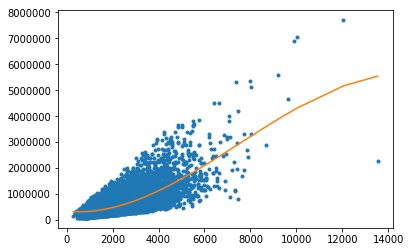

In [86]:
plt.plot(poly3['power_1'],poly3['price'],'.',
        poly3['power_1'], model3.predict(poly3),'-')

Visually, it looks even better than the power of 2. So, the higher the power, the best is the fit? Let's try the power of 7.

In [87]:
poly7 = create_powers(data['sqft_living'], 7)
my_features = poly7.column_names()
poly7['price'] = data['price']
model7 = tc.linear_regression.create(poly7, target = 'price', features = my_features, verbose = False)
model7.coefficients

name,index,value,stderr
(intercept),None,400701.918052,25233.3953867
power_1,None,-248.594344709,36.8944165794
power_2,None,0.206218957315,0.0176201742004
power_3,None,-3.65957293362e-05,3.4462673862e-06
power_4,None,2.87215349694e-09,2.3654382531e-10
power_5,None,1.37897806382e-14,3.083412531e-15
power_6,None,5.65166767968e-16,4.59505602189e-16
power_7,None,-4.52733578202e-22,2.77411212114e-23


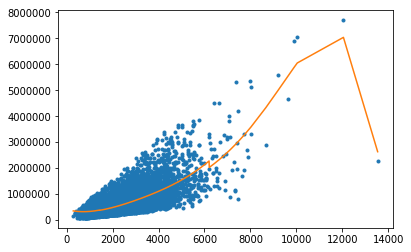

In [88]:
plt.plot(poly7['power_1'],poly7['price'],'.',
        poly7['power_1'], model7.predict(poly7),'-')

Wow, not quite good... we ended up with something called *"overfitting"*. There is an optimum power to fit the data and now we will see how to estimete it.

# Estimating the optimum power

A clever way to estimate the optimum power is to split the data into the *"test set"* and the *"train and validation set"*. The *"train and validation"* will actually consist in 2 sets (train and validation) on with we use the train set to compute the model and the validation set is used to calculate the RSS (residual sum of squares) and find its minimum (it is a line search method).

First, let's split the data into the 3 cited subsets:

In [89]:
training_and_validation, test_data = data.random_split(0.75, seed=1)
train_data, validation_data = training_and_validation.random_split(0.75, seed=1)

Now, let's create a function that receives the train and validation sets, the feature, the target, and the maximum power to be "tested". For each power, a model will be created and we will choose the one with the lowest error (smaller RSS), which ic computed by:

$$RSS(w_0,w_1) = \sum_{i=1}^{N}(y_i - y_{i}^{,})^2$$

The output is the optimized power and its RSS.

In [90]:
def power_line_search(train, validation, feature, target, power=1):
    # Let's create an empty RSS vector to receive the predictions errors
    RSS = np.zeros((power,1))
    
    # As we will generate a model for each power (even 1), start a loop
    for pw in range(1,power+1):
        # First let's create the model using the training set
        poly = create_powers(train[feature], pw)
        my_features = poly.column_names()
        poly[target] = train[target]
        model = tc.linear_regression.create(poly, target = target, features = my_features, verbose = False)
        
        # Now, let's compute the RSS for the validation set
        poly_val = create_powers(validation[feature], pw)
        predictions = model.predict(poly_val)
        real_val = validation[target].to_numpy()
        RSS[pw-1] = sum(np.transpose(real_val-predictions)*(real_val-predictions))
        
    # Now, let's find the minimum RSS and its respective power
    min_RSS = min(RSS)
    min_power = RSS.argmin() + 1
    
    # Return outputs
    return (min_power, min_RSS)

Now, let's check the function by giving the maxim power of 15.

In [91]:
power, RSS = power_line_search(train_data, validation_data, 'sqft_living', 'price', 15)

In [92]:
print power
print RSS

2
[2.47493151e+14]


We could find the optimum power. Let's see its fit over the testing set.

In [93]:
poly_test = create_powers(test_data['sqft_living'], power)
my_features = poly_test.column_names()
poly_test['price'] = test_data['price']
model_test = tc.linear_regression.create(poly_test, target = 'price', features = my_features, verbose = False)
model_test.coefficients

name,index,value,stderr
(intercept),None,116148.778178,13422.3223629
power_1,None,150.544699905,9.455032104
power_2,None,0.0214004282133,0.00149928791024


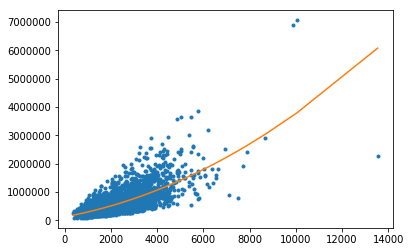

In [94]:
plt.plot(poly_test['power_1'],poly_test['price'],'.',
        poly_test['power_1'], model_test.predict(poly_test),'-')

We could find the best (optimum) power of the polynomial by a trial and error (line search). But it is costly, as we have to create a model for ech power. In a case where we are doing it for a large number of data, it can grow fast to a long elapse time. So, let's see some strategies on which we can "penalize" the weights (coefficients) of the polynomials and reduce the computational cost of the method.

# Ridge Regression

I am going to present a $L_2$ regularization method called [*Ridge Regression*](https://en.wikipedia.org/wiki/Tikhonov_regularization). The concept is to measure the magnitude of the coefficients (in this case, the [$L_2$-norm](http://mathworld.wolfram.com/L2-Norm.html), or sum of the squares) and minimize the cost function with this term included.

For the *ridge regression*, the cost function is the sum of the RSS and the weighted $L_2$-norm of the coefficients:

$$Cost = RSS(\textbf{w}) + \lambda ||\textbf{w}||^{2}_{2}$$

where $\lambda$ is the tuning parameter, which gives a balance of fit (avoid overfitting) and magnitude, and the $||\textbf{w}||^{2}_{2}$ is the $L_2$-norm of the coefficients. Now, let's write the matrix notation of the terms of the *Cost* equation:

$$RSS(\textbf{w}) = \sum_{i=1}^{N}(y_i - h(\textbf{x}_i)^{T}\textbf{w})^2 = (\textbf{y} - \textbf{Hw})^{T}(\textbf{y} - \textbf{Hw})$$

where $h(\textbf{x}_i)$ is a more general way to write a feature and $\textbf{H}$ is the matrix of all the features. For the $||\textbf{w}||^{2}_{2}$:

$$||\textbf{w}||^{2}_{2} = w_{0}^{2} + w_{1}^{2} + w_{2}^{2} + \dots + w_{n}^{2} = \textbf{w}^{T}\textbf{w}$$

Now, the total cost is:

$$Cost = (\textbf{y} - \textbf{Hw})^{T}(\textbf{y} - \textbf{Hw}) + \lambda\textbf{w}^{T}\textbf{w}$$

Now, to minimize the cost over the coefficients, we compute the gradient by deriving the total cost over **w**, resulting in:

$$Grad = -2\textbf{H}^{T}(\textbf{y} - \textbf{Hw}) + 2\lambda\textbf{w}$$

To find the minimum, we set the gradient equal zero. And let's use that **w** is equivalent to **Iw**, where **I** is the [*identity matrix*](https://en.wikipedia.org/wiki/Identity_matrix):

$$Grad = -2\textbf{H}^{T}(\textbf{y} - \textbf{Hw}) + 2\lambda\textbf{Iw} = 0$$

The new solution is:

$$\textbf{w} = (\textbf{H}^{T}\textbf{H} + \lambda\textbf{I})^{-1}\textbf{H}^{T}\textbf{y}$$

We must be careful on the choice of $\lambda$. Setting $\lambda = 0$, we are back to the [linear regression](../Linear_Regression/Linear_Regression.ipynb) solution. Having $\lambda = \infty$, **w** goes to zero. In others words, a $\lambda$ too small will not prevent overfit and a $\lambda$ too large will "delete" any fitting.

For the gradient descent, the $n^{th}$ update for the $j^{th}$ weight (coefficient) is:

$$w_{j}^{(n+1)} = w_{j}^{(n)} - \alpha [2*\sum_{i=1}^{N}h_j(\textbf{x}_i)(y_i - y^{,}_{i}(\textbf{w}^{n})) + 2\lambda w_{j}^{n}]$$

Ending up with:

$$w_{j}^{(n+1)} = (1 - 2\alpha\lambda)w_{j}^{(n)} - 2\alpha\sum_{i=1}^{N}h_j(\textbf{x}_i)(y_i - y^{,}_{i}(\textbf{w}^{n}))$$

It is quite similar to the [linear regression](../Linear_Regression/Linear_Regression.ipynb) solution, but with the new $(1 - 2\alpha\lambda)$ term.

Now, let's implementing it using the Turicreate.

First, let's create a data and a set of functions to help us in some tasks. Let's look at a synthetic dataset consisting of 30 points drawn from the sinusoid $y = \sin(4x)$. Call all the packages again, so you can run this part without the need to run the whole code. We will ending up by reconstructing some functions, but it is okay.

In [95]:
import turicreate as tc
import math
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Create an array with 30 points with values between 0 and 1.

In [96]:
random.seed(98103)
n = 30
x = tc.SArray([random.random() for i in range(n)])

Now, let's calculate the y values.

In [97]:
y = x.apply(lambda x: math.sin(4*x))

To make it more fun, let's add some error (noise) with Gaussian distribution.

In [98]:
random.seed(1)
e = tc.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

Let's put the data into a SFrame:

In [99]:
data = tc.SFrame({'X1':x,'Y':y})
data

X1,Y
0.259900980166,1.29159857394
0.645009669325,1.01565070661
0.0415680996791,0.187619251452
0.646757604091,0.271723311294
0.904388481397,-0.822250826305
0.161334144502,0.611912202808
0.607932453646,0.311028690551
0.620237537344,0.134681150357
0.470566981894,1.01832093982
0.569680357978,0.804170930683


Creating a function to plot the data in a more comfortable way.

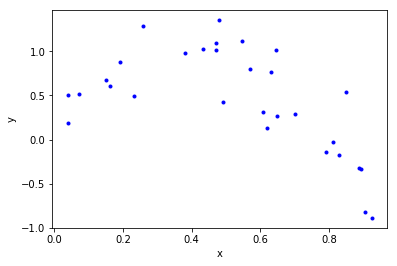

In [100]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'b.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

Now, let's create the functions to create the polynomial features and the polynomial regression. They will be very specific for this synthetic data.

In [101]:
# Defining the polynomial columns
def polynomial_features(data, power = 1):
    # This code is a more clever way to compute the powers
    data2 = data.copy() # Do not overwrite the data
    for i in range(1,power):
        # Just get your last power and multiply by the data of power 1
        data2['X'+str(i+1)] = data2['X'+str(i)]*data2['X1']
    
    # Return the data
    return data2

# Function for the polynomial regression
def polynomial_regression(data, power = 1):
    # Just using the Turicreate linear regression
    model = tc.linear_regression.create(polynomial_features(data,power), 
                                              target='Y', l2_penalty=0.,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    # The L2_penalty and L1_penalty equal to zero is to make sure the Turicreate
    # will not apply a Ridge Regression and/or Lasso
    
    # Return the model
    return model

One function to plot the predictions over the data.

In [102]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    power = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = tc.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,power))
    
    # Plot predictions
    plt.plot(x_pred['X1'], y_pred, 'r-', label='Power ' + str(power) + ' fit')
    plt.legend(loc='upper right')
    plt.axis([0,1,-1.5,2])

And one function to actually write the polynomial.

In [103]:
def print_coefficients(model):    
    # Get the power of the polynomial
    power = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Print the polynomial
    print 'Learned polynomial for power of ' + str(power) + ':'
    w.reverse()
    print np.poly1d(w)

Okay, now let's see what we created. Fitting a quadratic function:

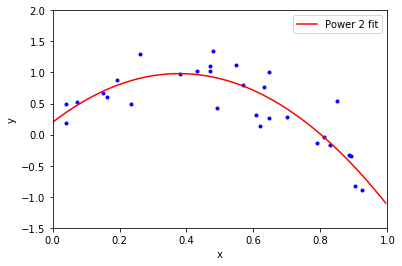

In [104]:
model = polynomial_regression(data, 2)
plot_poly_predictions(data,model)

In [105]:
print_coefficients(model)

Learned polynomial for power of 2:
        2
-5.479 x + 4.144 x + 0.1984


Let's check for a polynomial of $4^{th}$ degree (power = 4).

Learned polynomial for power of 4:
       4         3         2
-3.29 x + 7.153 x - 10.65 x + 5.503 x + 0.114


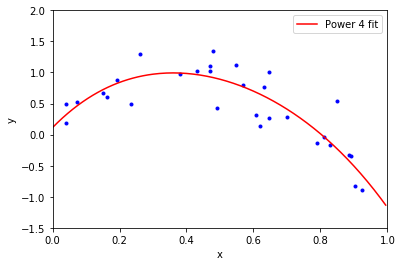

In [106]:
model = polynomial_regression(data, 4)
print_coefficients(model)
plot_poly_predictions(data,model)

And now, power = 30 (I am trying to overfit the data and see the resulted coefficients).

Learned polynomial for power of 30:
            30             29             28           27
-8.211e+06 x  + 1.733e+07 x  + 5.786e+06 x  - 2.4e+07 x 
              26             25             24             23
 - 5.745e+06 x  + 9.626e+06 x  + 1.629e+07 x  - 1.177e+07 x 
             22             21             20             19
 + 9.88e+06 x  - 4.879e+06 x  - 8.353e+06 x  - 7.121e+06 x 
              18             17             16             15
 + 4.676e+06 x  + 1.618e+07 x  - 5.886e+06 x  + 3.713e+04 x 
              14             13             12             11
 - 9.331e+06 x  + 9.301e+05 x  + 9.253e+06 x  - 4.696e+06 x 
              10             9             8             7            6
 - 1.396e+06 x  + 2.707e+06 x - 1.834e+06 x + 2.944e+05 x + 5.92e+05 x
              5             4             3        2
 - 4.986e+05 x + 1.792e+05 x - 3.385e+04 x + 3356 x - 154.8 x + 2.934


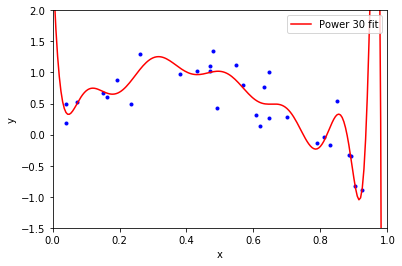

In [107]:
model = polynomial_regression(data, 30)
print_coefficients(model)
plot_poly_predictions(data,model)

See how weird the coefficients became? Too large!!!!

Now, let's include the L2_penalty (ridge regression) in our function.

In [108]:
def ridge_regression(data, power, l2_penalty):
    # Just using the Turicreate linear regression with the L2_penalty
    model_rr = tc.linear_regression.create(polynomial_features(data,power), 
                                              target='Y', l2_penalty=l2_penalty,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    
    # Return the model
    return model_rr

Let's retest the power 16 fit with the linear regression. We just need to set the l2_penalty... wait, what is a good value for the l2_penalty? Let's do the fit for some of them and let's try to understand the coefficients and the plots.

Lambda = 1.00e-25
Learned polynomial for power of 16:
           16             15             14             13
7.716e+05 x  + 8.965e+05 x  - 1.201e+07 x  + 2.226e+07 x 
              12             11             10             9
 - 1.246e+07 x  - 4.168e+06 x  + 1.623e+06 x  + 1.161e+07 x
              8             7            6             5             4
 - 1.396e+07 x + 6.606e+06 x - 9.15e+05 x - 4.476e+05 x + 2.405e+05 x
              3        2
 - 4.939e+04 x + 5018 x - 236 x + 4.365


Lambda = 1.00e-10
Learned polynomial for power of 16:
           16             15        14             13             12
5.391e+04 x  - 1.026e+05 x  + 3337 x  + 5.811e+04 x  + 2.524e+04 x 
              11             10         9             8        7
 - 2.379e+04 x  - 3.027e+04 x  + 135.8 x + 1.986e+04 x + 4618 x
              6        5        4         3         2
 - 1.162e+04 x + 2460 x + 1116 x - 534.2 x + 75.88 x - 1.217 x + 0.3174


Lambda = 1.00e-06
Learned polynomial for power of 16

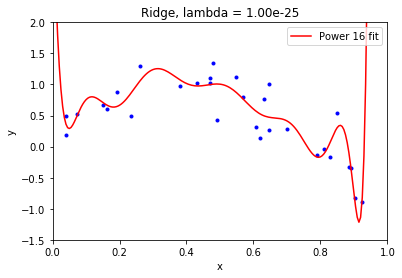

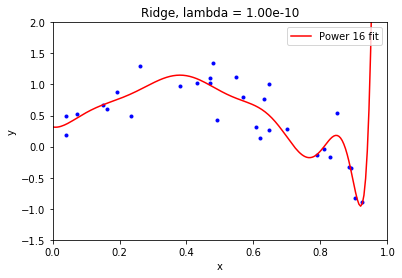

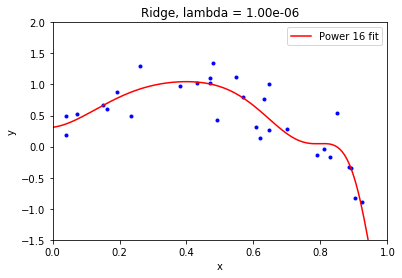

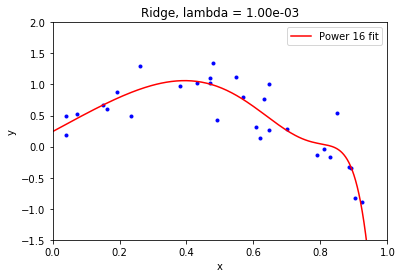

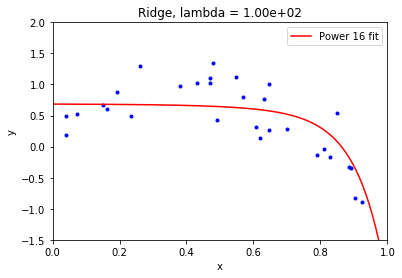

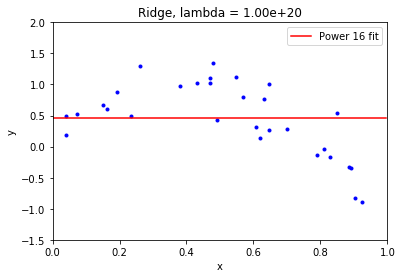

In [109]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2, 1e20]:
    model_ridge = ridge_regression(data, 16, l2_penalty=l2_penalty)
    print 'Lambda = %.2e' % l2_penalty
    print_coefficients(model_ridge)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model_ridge)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

Okay... interesting. The best value for $\lambda$ shows to be 1e-3. For a very small $\lambda$, we were unable to prevent the overfitting. Selecting large values of $\lambda$, we tend to have a constant model.

One method to estimate the best $\lambda$ is by doing a [*k-fold corss validation*](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). In this method, the idea is to take your training data and divide it in *k* different subsets. If we have *N* data points and we choose *k* subsets, we will hava $N/k$ data points per subset. For a fixed $\lambda_1$, we remove on of the *k*'s subsets from the training data and run the ridge regression over the rest of the training data. The removed subset is used as a validation set on which we calculate the error of the model for the fixed $\lambda_1$. Now, we put back the subset into the training data and we remove **another** subset, applying the ridge regression on the remaining training data and calculating the error over the new validation set using the same fixed $\lambda_1$. This is applied for all the *k*'s subsets for a fixed $\lambda_1$. Now, the average error of the errors of all *k*'s validation sets for the fixed $\lambda_1$, which will be:

$$Average{\_}Error(\lambda_1) = \frac{1}{k}\sum_{j = 1}^{k}error_{j}(\lambda_1)$$

Now we fix a new $\lambda_2$ and repeat the process. If we have an array with *D* values of $\lambda$, we do the process for all of them and we will and with an array with *D* average errors. The optimum $\lambda$ is the one with the lowest average error.

The following function separate the input data in *k* different folds (user input) and apply the k-fold cross validation.

In [110]:
def split_train_validation(data, min_ind, max_ind):
    # Function to separate the SFrame data into 2 subsets based on the min and maximum
    # indexes of the validation set
    nr = data.num_rows()
    
    # Boundary conditions
    if max_ind > (nr - 1):
        max_ind = nr - 1
    
    # Getting validation set
    validation = data[min_ind:max_ind]
    
    # Getting the train set
    if min_ind == 0:
        train = data[(max_ind + 1): -1]
    
    elif max_ind == (nr - 1):
        train = data[0:(min_ind - 1)]
        
    else:
        train = data[0:(min_ind - 1)]
        train = train.append(data[(max_ind + 1): -1])
    
    # Return outputs
    return train,validation

In [111]:
def k_fold_cross_validation(data, power, l2_penalty_array, k_folds):
    k_folds_size = len(data)/k_folds
    nr = data.num_rows()
    
    # Polynomial data
    poly = polynomial_features(data, power)
    
    # Initializing the array to receive the mean squared erros
    mse = np.zeros((len(l2_penalty_array),1))
    count = 0
    
    # Start the loop for all the l2 penalty values
    for l2_penalty in l2_penalty_array:
        t_mse = 0.0
        min_ind = 0
        max_ind = k_folds_size - 1
        
        while min_ind < (nr - 1):
            # Split data into train and validation sets
            train, validation = split_train_validation(poly,min_ind, max_ind)
            
            # train model
            model = tc.linear_regression.create(train,target='Y', l2_penalty=l2_penalty, 
                                                validation_set=None,verbose=False)
            
            # predict on validation set 
            y_test_predicted = model.predict(validation)
            
            # compute squared error
            t_mse += ((y_test_predicted-validation['Y'])**2).sum()
            
            # Adjusting min and max indexes
            min_ind = max_ind + 1
            max_ind += k_folds_size
        
        
        # save squared error in list of MSE for each l2_penalty
        mse[count] = t_mse/k_folds
        count += 1
    
    # Getting the minimum "mean square error" and the best l2 penalty
    best_l2_penalty = l2_penalty_array[np.argmin(mse)]
    
    # Return the values
    return mse,best_l2_penalty

Testing...

In [112]:
l2_penalty_values = np.logspace(-4, 10, num=30)
k_folds = len(data)/2
l2_penalty_mse,best_l2_penalty = k_fold_cross_validation(data, 16, l2_penalty_values, k_folds)

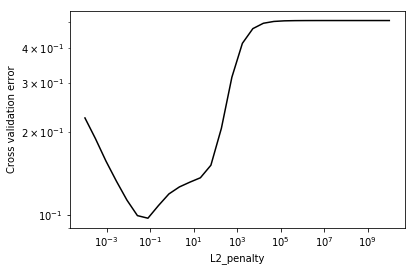

In [113]:
plt.plot(l2_penalty_values,l2_penalty_mse,'k-')
plt.xlabel('L2_penalty')
plt.ylabel('Cross validation error')
plt.xscale('log')
plt.yscale('log')

The figure above shows a value for the *l2_penalty* that actually is the minimum of the cross *cross validation errors*. This should be the most optimum choice for a fit that balances between overfitting and accuracy.

In [114]:
best_l2_penalty

0.07880462815669913

Lambda = 7.88e-02
Learned polynomial for power of 16:
        16         15        14         13         12         11
-6.451 x  - 3.541 x  - 1.25 x  + 0.457 x  + 1.614 x  + 2.255 x 
         10         9         8          7          6         5
 + 2.42 x  + 2.155 x + 1.518 x + 0.5933 x - 0.4885 x - 1.523 x
          4         3          2
 - 2.183 x - 1.992 x - 0.4506 x + 2.016 x + 0.4036




Text(0.5,1,u'Ridge, lambda = 7.88e-02')

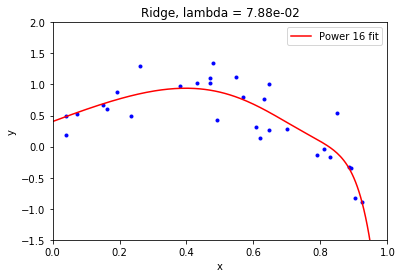

In [115]:
model_best = ridge_regression(data, 16, l2_penalty = best_l2_penalty)
print 'Lambda = %.2e' % best_l2_penalty
print_coefficients(model_best)
print '\n'
plt.figure()
plot_poly_predictions(data,model_best)
plt.title('Ridge, lambda = %.2e' % best_l2_penalty)